In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import sys, os
sys.path.append(os.path.abspath("../src")) 
import train
import importlib

importlib.reload(train)  # reloads the UPDATED code

from train import plot_history, fit_model

In [2]:
data = pd.read_csv('credit_risk_dataset.csv')

In [ ]:
data.head()
# cb_person_default_on_file: Historical default
# cb_person_cred_hist_length: Credit history length, how long the person has had credit accounts

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [3]:
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
data[data['person_emp_length'].isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [7]:
data[data['person_emp_length'] == 0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
16,23,120000,RENT,0.0,EDUCATION,A,35000,7.90,0,0.29,N,4
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3
27,23,11000,OWN,0.0,PERSONAL,A,1400,9.32,0,0.13,N,3
45,26,300000,MORTGAGE,0.0,EDUCATION,D,25000,15.33,0,0.08,N,3
49,26,89028,RENT,0.0,DEBTCONSOLIDATION,A,30000,6.62,1,0.34,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32563,52,71520,RENT,0.0,EDUCATION,E,7000,16.82,1,0.10,Y,24
32564,53,45000,RENT,0.0,PERSONAL,C,5600,13.79,0,0.12,N,28
32572,52,52000,OWN,0.0,PERSONAL,A,9600,8.49,0,0.18,N,22
32573,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N,19


In [9]:
data['person_emp_length'].describe()

count    31686.000000
mean         4.789686
std          4.142630
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

<Axes: xlabel='person_age', ylabel='Count'>

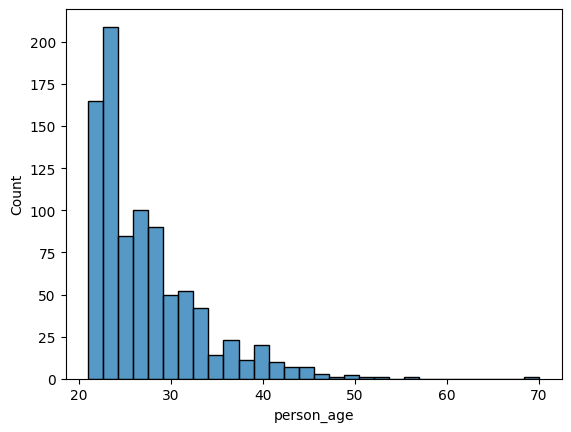

In [15]:
emp_length_na = data[data['person_emp_length'].isna()]

sns.histplot(emp_length_na, x = 'person_age', bins = 30)

In [17]:
emp_length_na['person_age'].describe()

count    895.000000
mean      27.284916
std        5.885403
min       21.000000
25%       23.000000
50%       25.000000
75%       30.000000
max       70.000000
Name: person_age, dtype: float64

<Axes: xlabel='person_age', ylabel='Count'>

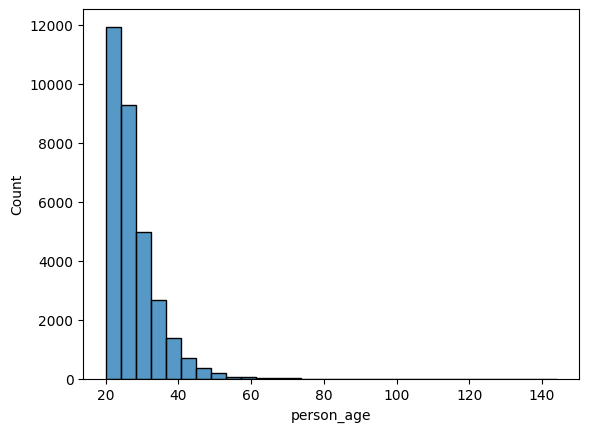

In [16]:
emp_length_nonna = data[~data['person_emp_length'].isna()]

sns.histplot(emp_length_nonna, x = 'person_age', bins = 30)

In [ ]:
emp_length_nonna['person_age'].describe()

count    31686.000000
mean        27.747302
std          6.360283
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

<Axes: xlabel='loan_amnt', ylabel='Count'>

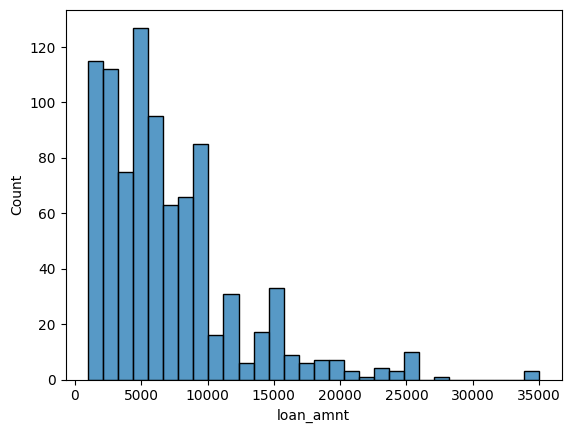

In [21]:
sns.histplot(emp_length_na, x = 'loan_amnt', bins = 30)

In [23]:
emp_length_na['loan_amnt'].describe()

count      895.000000
mean      7041.508380
std       5194.945349
min       1000.000000
25%       3200.000000
50%       6000.000000
75%       9675.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<Axes: xlabel='loan_amnt', ylabel='Count'>

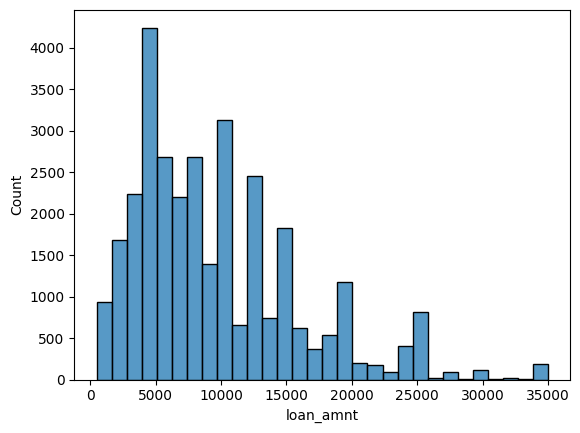

In [24]:
sns.histplot(emp_length_nonna, x = 'loan_amnt', bins = 30)

In [25]:
emp_length_nonna['loan_amnt'].describe()

count    31686.000000
mean      9661.337815
std       6336.226458
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<Axes: xlabel='person_income', ylabel='Count'>

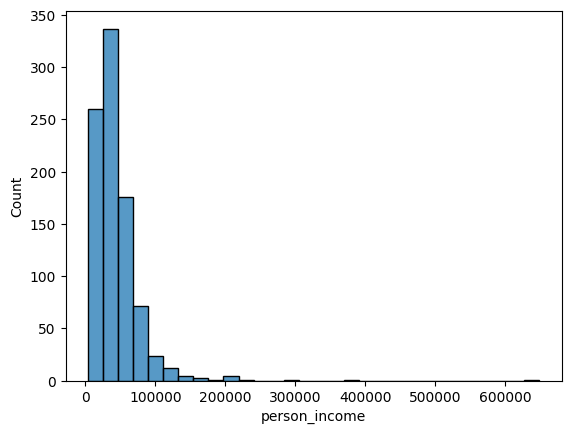

In [26]:
sns.histplot(emp_length_na, x = 'person_income', bins = 30)

In [27]:
emp_length_na['person_income'].describe()

count       895.000000
mean      44229.924022
std       37369.685990
min        4200.000000
25%       24000.000000
50%       36000.000000
75%       55000.000000
max      648000.000000
Name: person_income, dtype: float64

<Axes: xlabel='person_income', ylabel='Count'>

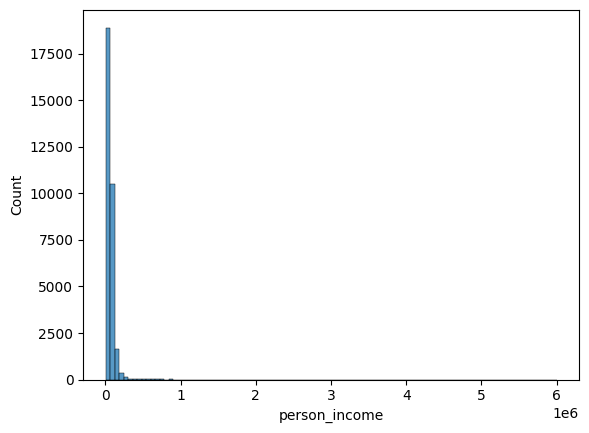

In [30]:
sns.histplot(emp_length_nonna, x = 'person_income', bins = 100)

In [31]:
emp_length_nonna['person_income'].describe()

count    3.168600e+04
mean     6.669188e+04
std      6.242729e+04
min      4.000000e+03
25%      3.939700e+04
50%      5.600000e+04
75%      8.000000e+04
max      6.000000e+06
Name: person_income, dtype: float64

In [32]:
emp_length_nonna['loan_grade'].value_counts()

loan_grade
A    10371
B    10186
C     6321
D     3556
E      952
F      236
G       64
Name: count, dtype: int64

In [33]:
emp_length_na['loan_grade'].value_counts()

loan_grade
A    406
B    265
C    137
D     70
E     12
F      5
Name: count, dtype: int64

In [34]:
emp_length_na['person_home_ownership'].value_counts()

person_home_ownership
RENT        370
MORTGAGE    351
OWN         174
Name: count, dtype: int64

In [35]:
emp_length_nonna['person_home_ownership'].value_counts()

person_home_ownership
RENT        16076
MORTGAGE    13093
OWN          2410
OTHER         107
Name: count, dtype: int64

In [36]:
emp_length_nonna['loan_intent'].value_counts()

loan_intent
EDUCATION            6290
MEDICAL              5897
VENTURE              5556
PERSONAL             5369
DEBTCONSOLIDATION    5064
HOMEIMPROVEMENT      3510
Name: count, dtype: int64

In [37]:
emp_length_na['loan_intent'].value_counts()

loan_intent
MEDICAL              174
EDUCATION            163
VENTURE              163
PERSONAL             152
DEBTCONSOLIDATION    148
HOMEIMPROVEMENT       95
Name: count, dtype: int64

In [38]:
emp_length_na['loan_status'].value_counts()

loan_status
0    613
1    282
Name: count, dtype: int64

In [39]:
emp_length_nonna['loan_status'].value_counts()

loan_status
0    24860
1     6826
Name: count, dtype: int64

In [43]:
282/(282+613)

0.31508379888268156

There does not seem to be big differences between people who have NA values for employment length and people who actually have employment length however for variables like loan_amnt and person_income there does seem to be differences so we can say missingness at random (MAR). Also the default rates between NA group (31%) and non NA group (21%) is different. Since tree based models like XGBoost and CatBoost can handle NA values we will leave them as is and hope for model to pickup signals based on NA values to predict default

<Axes: xlabel='person_age', ylabel='Count'>

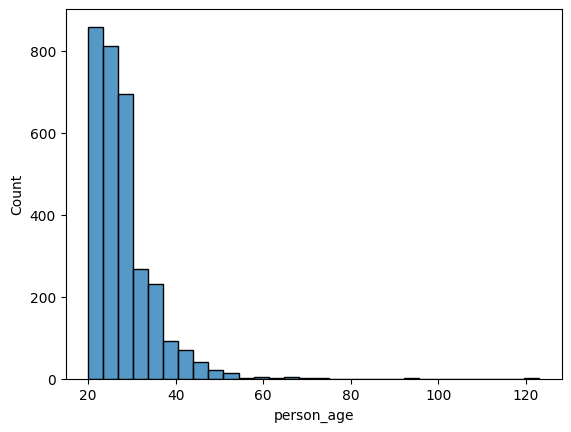

In [4]:
loan_int_na = data[data['loan_int_rate'].isna()]

sns.histplot(loan_int_na, x = 'person_age', bins = 30)

In [46]:
loan_int_na['person_age'].describe()

count    3116.000000
mean       27.922657
std         6.782386
min        20.000000
25%        23.000000
50%        26.000000
75%        30.000000
max       123.000000
Name: person_age, dtype: float64

<Axes: xlabel='person_age', ylabel='Count'>

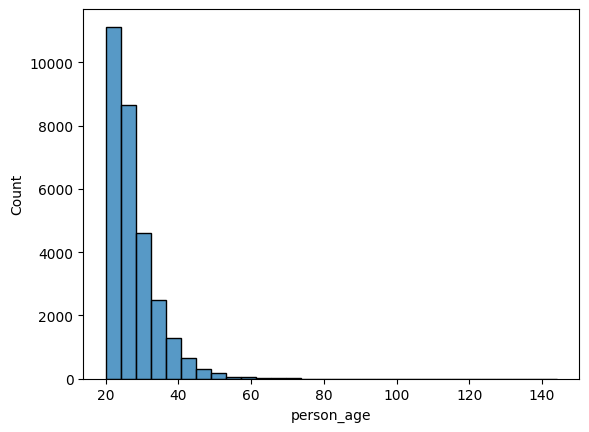

In [4]:
loan_int_nonna = data[~data['loan_int_rate'].isna()]

sns.histplot(loan_int_nonna, x = 'person_age', bins = 30)

In [48]:
loan_int_nonna['person_age'].describe()

count    29465.000000
mean        27.714712
std          6.300193
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

<Axes: xlabel='loan_amnt', ylabel='Count'>

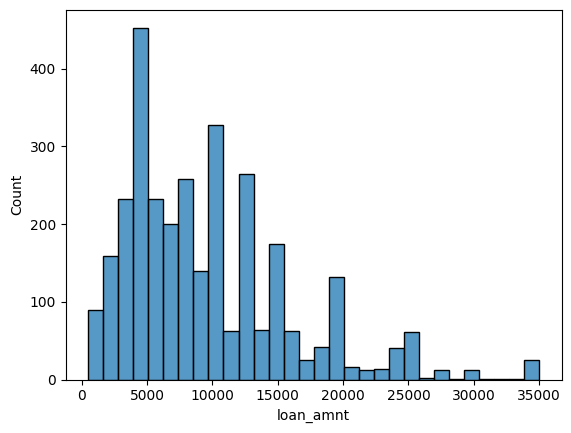

In [54]:
sns.histplot(loan_int_na, x = 'loan_amnt', bins = 30)

In [55]:
loan_int_na['loan_amnt'].describe()

count     3116.000000
mean      9633.119384
std       6377.661049
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<Axes: xlabel='loan_amnt', ylabel='Count'>

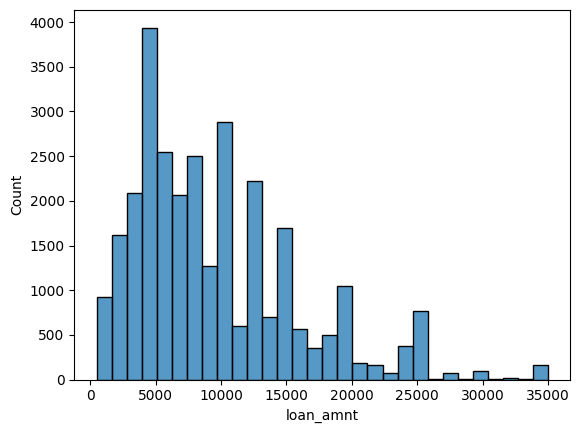

In [56]:
sns.histplot(loan_int_nonna, x = 'loan_amnt', bins = 30)

In [57]:
loan_int_nonna['loan_amnt'].describe()

count    29465.000000
mean      9584.744612
std       6316.272282
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12250.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<Axes: xlabel='person_income', ylabel='Count'>

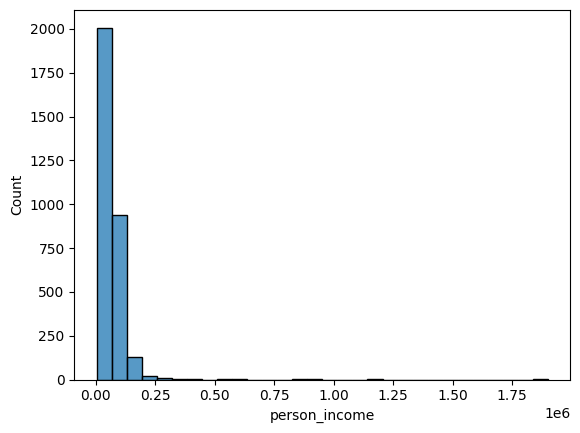

In [58]:
sns.histplot(loan_int_na, x = 'person_income', bins = 30)

In [59]:
loan_int_na['person_income'].describe()

count    3.116000e+03
mean     6.658905e+04
std      6.275810e+04
min      4.888000e+03
25%      3.850000e+04
50%      5.564000e+04
75%      8.000000e+04
max      1.900000e+06
Name: person_income, dtype: float64

<Axes: xlabel='person_income', ylabel='Count'>

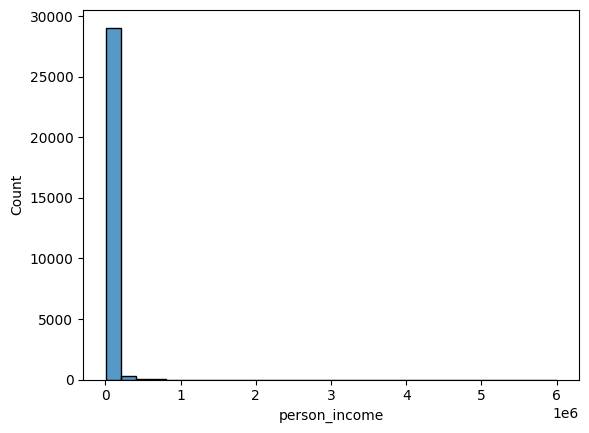

In [60]:
sns.histplot(loan_int_nonna, x = 'person_income', bins = 30)

In [61]:
loan_int_nonna['person_income'].describe()

count    2.946500e+04
mean     6.602047e+04
std      6.190142e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.910000e+04
max      6.000000e+06
Name: person_income, dtype: float64

In [63]:
loan_int_na['loan_grade'].value_counts()

loan_grade
B    1056
A    1003
C     630
D     312
E      83
F      27
G       5
Name: count, dtype: int64

In [64]:
loan_int_nonna['loan_grade'].value_counts()

loan_grade
A    9774
B    9395
C    5828
D    3314
E     881
F     214
G      59
Name: count, dtype: int64

In [65]:
loan_int_na['person_home_ownership'].value_counts()

person_home_ownership
RENT        1553
MORTGAGE    1322
OWN          228
OTHER         13
Name: count, dtype: int64

In [66]:
loan_int_nonna['person_home_ownership'].value_counts()

person_home_ownership
RENT        14893
MORTGAGE    12122
OWN          2356
OTHER          94
Name: count, dtype: int64

In [67]:
loan_int_na['loan_intent'].value_counts()

loan_intent
MEDICAL              620
EDUCATION            599
VENTURE              566
DEBTCONSOLIDATION    509
PERSONAL             507
HOMEIMPROVEMENT      315
Name: count, dtype: int64

In [68]:
loan_int_nonna['loan_intent'].value_counts()

loan_intent
EDUCATION            5854
MEDICAL              5451
VENTURE              5153
PERSONAL             5014
DEBTCONSOLIDATION    4703
HOMEIMPROVEMENT      3290
Name: count, dtype: int64

In [72]:
loan_int_na['loan_status'].value_counts()

loan_status
0    2472
1     644
Name: count, dtype: int64

In [73]:
loan_int_nonna['loan_status'].value_counts()

loan_status
0    23001
1     6464
Name: count, dtype: int64

In [82]:
print(f'default rate when interest rate is NA: {644/(644+2472):.2f}')

default rate when interest rate is NA: 0.21


In [84]:
print(f'default rate when interest rate is not NA: {6464/(6464+23001):.2f}')

default rate when interest rate is not NA: 0.22


<Axes: xlabel='loan_grade', ylabel='loan_int_rate'>

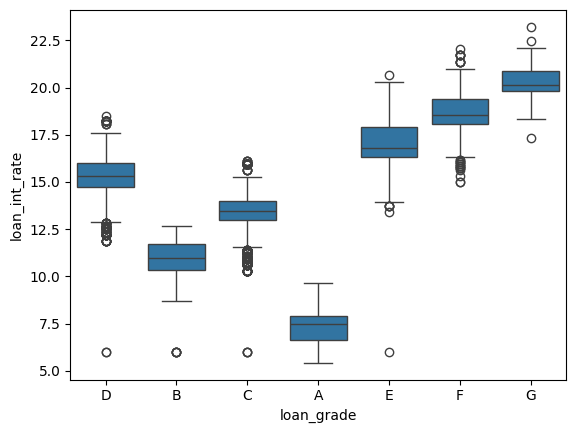

In [76]:
sns.boxplot(loan_int_nonna, x = 'loan_grade', y = 'loan_int_rate')

there does not seem to be difference in variables when loan interest rate is NA and non NA thus we can say they are missing completely at random (MCAR) and NA values dont carry important information for default prediction, because of this we decided to impute NA values with the median of each loan_grade's loan interest rate

In [5]:
interest_map = loan_int_nonna.groupby('loan_grade')['loan_int_rate'].median()

data['loan_int_rate'] = data['loan_int_rate'].fillna(
    data['loan_grade'].map(interest_map)
)

In [6]:
data.isna().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             895
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [87]:
data[data['person_emp_length'] > 40]
# we can remove people with emp_length = 123

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
32355,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,N,25


In [7]:
data = data[(data['person_emp_length'] < 123) | (data['person_emp_length'].isna())]

In [91]:
data[data['person_age'] > 100]
# we can remove people with age >= 123

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,10.99,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [8]:
data = data[data['person_age'] < 100]

In [94]:
data['loan_amnt'].describe()

count    32574.000000
mean      9588.018051
std       6320.249598
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12200.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [11]:
data['loan_int_rate'].describe()

count    32574.000000
mean        11.013752
std          3.212328
min          5.420000
25%          7.880000
50%         10.990000
75%         13.480000
max         23.220000
Name: loan_int_rate, dtype: float64

In [12]:
data['loan_percent_income'].describe()

count    32574.000000
mean         0.170202
std          0.106755
min          0.000000
25%          0.090000
50%          0.150000
75%          0.230000
max          0.830000
Name: loan_percent_income, dtype: float64

In [14]:
data[data['loan_percent_income'] > 0.7]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
460,24,18000,OWN,6.0,PERSONAL,A,13000,7.88,1,0.72,N,3
571,21,19500,MORTGAGE,0.0,EDUCATION,B,15000,9.64,1,0.77,N,2
577,26,26000,RENT,10.0,EDUCATION,B,20050,9.76,1,0.77,N,2
640,22,20000,MORTGAGE,0.0,PERSONAL,B,16600,9.76,0,0.83,N,3
2452,25,32004,MORTGAGE,3.0,PERSONAL,A,22750,6.17,0,0.71,N,4
10007,21,13000,RENT,0.0,DEBTCONSOLIDATION,C,9250,12.53,1,0.71,N,3
18203,30,32004,RENT,1.0,PERSONAL,B,24250,11.12,1,0.76,N,5
23727,32,12000,RENT,1.0,MEDICAL,A,9325,8.38,1,0.78,N,6
27878,33,10080,OWN,11.0,VENTURE,A,7200,6.03,1,0.71,N,8


In [15]:
data['cb_person_cred_hist_length'].describe()

count    32574.000000
mean         5.804108
std          4.053873
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64

In [21]:
data[(data['cb_person_cred_hist_length'] > 20) & (data['person_age'] < 50)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [22]:
interest_map

loan_grade
A     7.490
B    10.990
C    13.480
D    15.310
E    16.820
F    18.535
G    20.160
Name: loan_int_rate, dtype: float64

In [9]:
data['intrate_median_diff'] = data['loan_int_rate'] - data['loan_grade'].map(interest_map)

In [10]:
data['loan_over_credithist'] = data['loan_amnt'] / data['cb_person_cred_hist_length']
data['emp_length_missing'] = data['person_emp_length'].isna().astype(int)

In [10]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,intrate_median_diff,loan_over_credithist,emp_length_missing
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.15,500.000000,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,-0.61,1833.333333,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,1.75,17500.000000,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0.79,8750.000000,0
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,-0.35,1250.000000,0


In [31]:
data['person_home_ownership'].unique()

array(['OWN', 'MORTGAGE', 'RENT', 'OTHER'], dtype=object)

In [32]:
data['loan_intent'].unique()

array(['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [34]:
data['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    26830
Y     5744
Name: count, dtype: int64

<Axes: xlabel='loan_status', ylabel='person_age'>

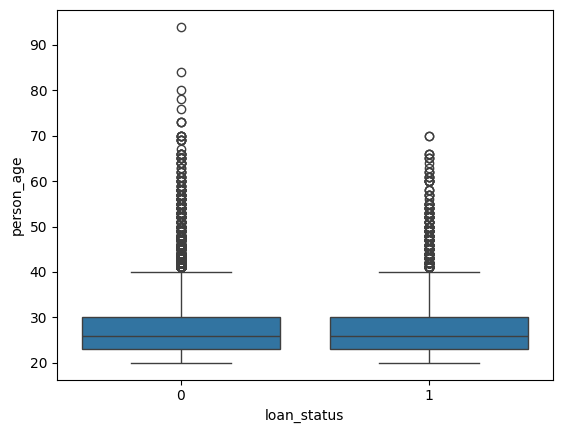

In [ ]:
sns.boxplot(data, x = 'loan_status', y = 'person_age')

In [76]:
data.groupby('loan_status').agg(median = ('person_age', 'median'),
                                mean = ('person_age', 'mean'),
                                stddev = ('person_age', 'std'),
                                min = ('person_age','min'),
                                max = ('person_age', 'max'))

,median,mean,stddev,min,max
loan_status,,,,,
0,26.0,27.786233,6.186911,20,94
1,26.0,27.475447,6.263746,20,70


<Axes: xlabel='loan_status', ylabel='person_income'>

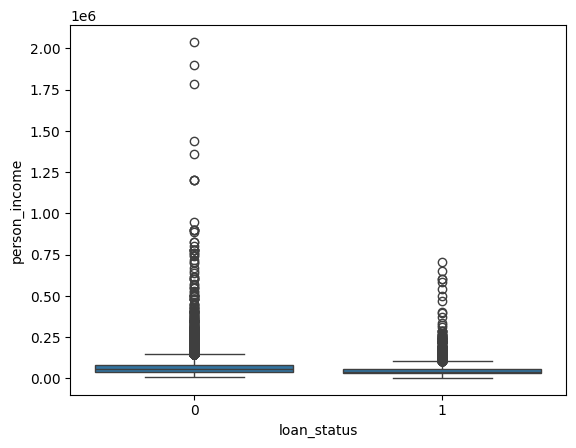

In [ ]:
sns.boxplot(data, x = 'loan_status', y = 'person_income')

In [38]:
data.groupby('loan_status').agg(median_income = ('person_income', 'median'),
                                mean_income = ('person_income', 'mean'),
                                stddev_income = ('person_income', 'std'),
                                min_income = ('person_income','min'),
                                max_income = ('person_income', 'max'))

,median_income,mean_income,stddev_income,min_income,max_income
loan_status,,,,,
0,60000.0,70554.030628,55221.428066,7000,2039784
1,41496.0,49124.262839,36909.787452,4000,703800


<Axes: xlabel='loan_status', ylabel='person_emp_length'>

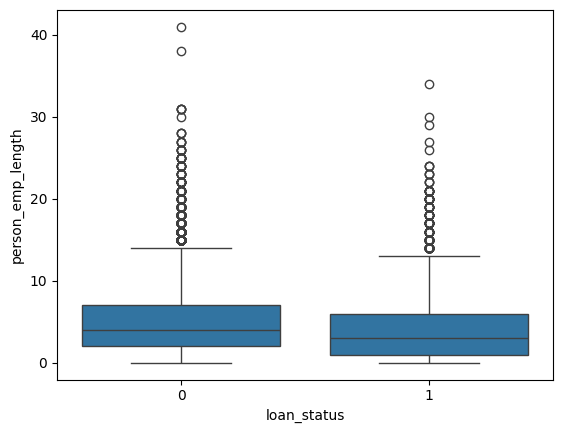

In [ ]:
sns.boxplot(data, x = 'loan_status', y = 'person_emp_length')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

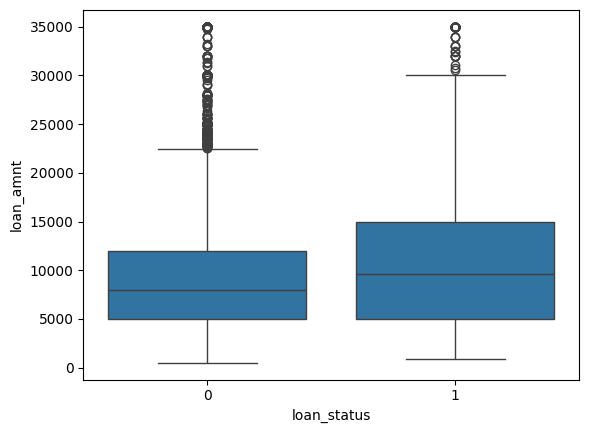

In [40]:
sns.boxplot(data, x = 'loan_status', y = 'loan_amnt')

<Axes: xlabel='loan_status', ylabel='loan_int_rate'>

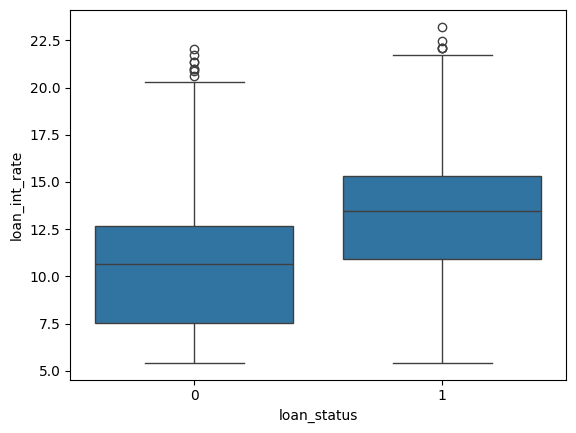

In [42]:
sns.boxplot(data, x = 'loan_status', y = 'loan_int_rate') 

<Axes: xlabel='loan_status', ylabel='loan_percent_income'>

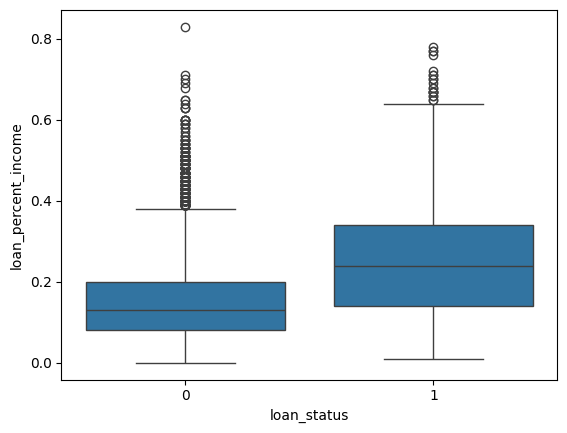

In [41]:
sns.boxplot(data, x = 'loan_status', y = 'loan_percent_income') 

<Axes: xlabel='loan_status', ylabel='loan_over_credithist'>

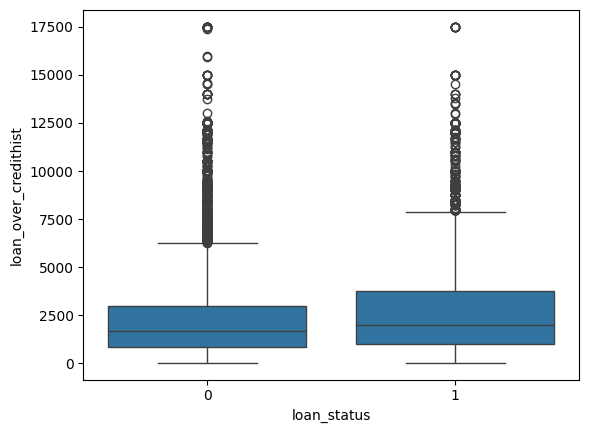

In [43]:
sns.boxplot(data, x = 'loan_status', y = 'loan_over_credithist') 

<Axes: xlabel='loan_status', ylabel='intrate_median_diff'>

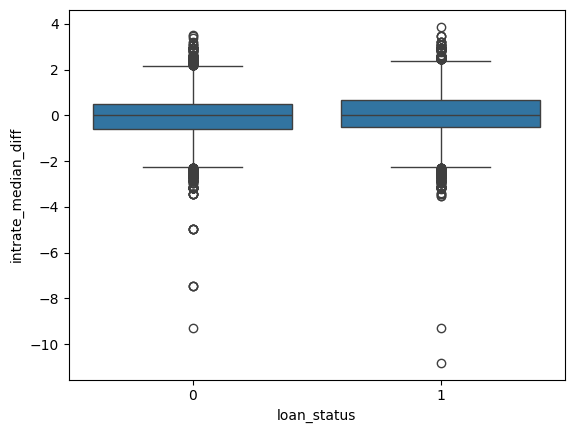

In [44]:
sns.boxplot(data, x = 'loan_status', y = 'intrate_median_diff') 

In [58]:
def get_percentages(df = data, x = 'loan_status', y = None, var_name = None):
    series_temp_default = df[df[x] == 1][y].value_counts() / len(df[df[x] == 1])
    df_temp_default = pd.DataFrame({var_name:series_temp_default.index, 'perc_default':series_temp_default.values})
    series_temp_all = df[y].value_counts() / len(df)
    df_temp_all = pd.DataFrame({var_name:series_temp_all.index, 'perc_all':series_temp_all.values})
    final_df = df_temp_default.merge(df_temp_all, on = var_name)
    return final_df

grade = get_percentages(data, x = 'loan_status', y = 'loan_grade', var_name = 'grade')
grade
# based on this we can say that people who have loan from D,E,F,G are relatively at
# high risk of default and these grades are the ones with higher interest rates. 
# That is why in the boxplot loan status vs interest rate we see default has bigger
#  interest rate however when we look at loan status vs interest rate median diff 
# we dont see that much of a difference. Thus we don't have to include intrate_median_diff

,grade,perc_default,perc_all
0,D,0.301112,0.111285
1,B,0.239341,0.320747
2,C,0.188406,0.198195
3,A,0.150978,0.330816
4,E,0.087379,0.029594
5,F,0.023920,0.007399
6,G,0.008864,0.001965


In [59]:
ownership = get_percentages(data, x = 'loan_status', y = 'person_home_ownership', var_name = 'ownership')
ownership

,ownership,perc_default,perc_all
0,RENT,0.730407,0.504758
1,MORTGAGE,0.237794,0.412630
2,OWN,0.027156,0.079327
3,OTHER,0.004643,0.003285


In [60]:
intent = get_percentages(data, x = 'loan_status', y = 'loan_intent', var_name = 'intent')
intent

,intent,perc_default,perc_all
0,MEDICAL,0.228085,0.186376
1,DEBTCONSOLIDATION,0.209652,0.160005
2,EDUCATION,0.156325,0.198041
3,PERSONAL,0.154355,0.169430
4,HOMEIMPROVEMENT,0.132405,0.110671
5,VENTURE,0.119178,0.175477


In [61]:
default_before = get_percentages(data, x = 'loan_status', y = 'cb_person_default_on_file', var_name = 'before_default')
default_before

,before_default,perc_default,perc_all
0,N,0.694527,0.823663
1,Y,0.305473,0.176337


<Axes: xlabel='loan_status', ylabel='cb_person_cred_hist_length'>

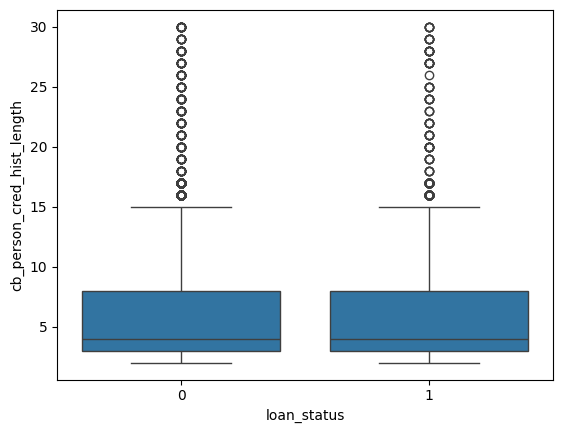

In [48]:
sns.boxplot(data, x = 'loan_status', y = 'cb_person_cred_hist_length') 

<Axes: xlabel='loan_grade', ylabel='loan_amnt'>

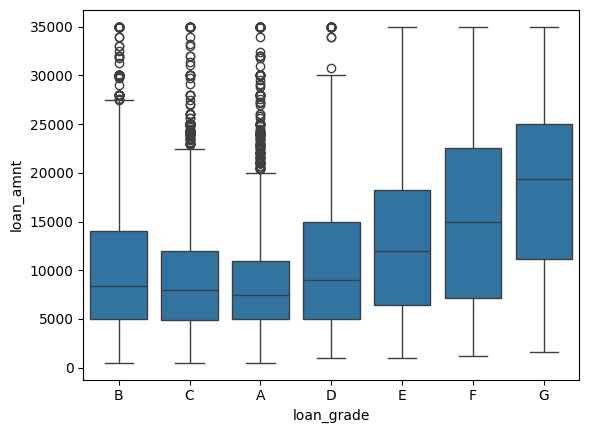

In [62]:
sns.boxplot(data, x = 'loan_grade', y = 'loan_amnt') 

In [70]:
data[ data['person_income'] == 0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,intrate_median_diff,loan_over_credithist,emp_length_missing,income_over_emplength


In [11]:
# income / length
data['income_over_emplength'] = data['person_income'] / (data['person_emp_length'] + 0.0001)
data.groupby('loan_status').agg(median = ('income_over_emplength', 'median'),
                                mean = ('income_over_emplength', 'mean'),
                                stddev = ('income_over_emplength', 'std'),
                                min = ('income_over_emplength','min'),
                                max = ('income_over_emplength', 'max'))
# this variable did not create meaningful results especially for the records where employment lenght is 0 

,median,mean,stddev,min,max
loan_status,,,,,
0,14999.500017,7.591762e+07,2.783747e+08,850.905223,2.039784e+10
1,13999.650009,7.197402e+07,2.002861e+08,539.196405,2.630000e+09


In [12]:
# loan_amnt / age  
data['loan_over_age'] = data['loan_amnt'] / (data['person_age'])
data.groupby('loan_status').agg(median = ('loan_over_age', 'median'),
                                mean = ('loan_over_age', 'mean'),
                                stddev = ('loan_over_age', 'std'),
                                min = ('loan_over_age','min'),
                                max = ('loan_over_age', 'max'))

# seems like new variable is associated with the default probability so we can include this in our feature set as well

,median,mean,stddev,min,max
loan_status,,,,,
0,288.461538,343.137709,230.282761,15.151515,1590.909091
1,344.827586,406.439271,273.081692,14.285714,1590.909091


<Axes: xlabel='loan_status', ylabel='loan_over_age'>

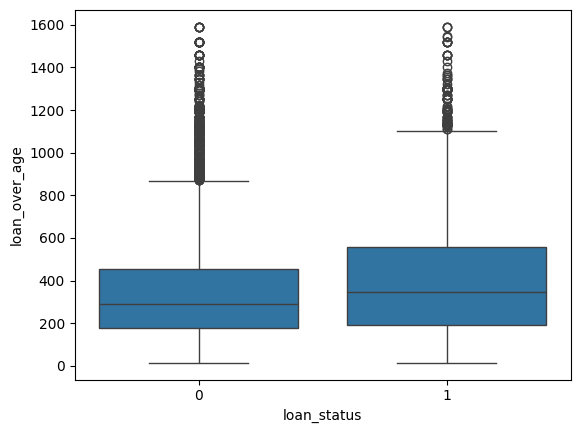

In [13]:
sns.boxplot(data, x = 'loan_status', y = 'loan_over_age') 

In [14]:
# do not include income_over_emplength and intrate_median_diff
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,intrate_median_diff,loan_over_credithist,emp_length_missing,income_over_emplength,loan_over_age
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.15,500.000000,0,1919.961601,47.619048
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,-0.61,1833.333333,0,9599.040096,220.000000
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,1.75,17500.000000,0,16374.590635,1521.739130
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0.79,8750.000000,0,6799.915001,1458.333333
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,-0.35,1250.000000,0,4949.752512,119.047619


In [17]:
data.loc[:, ['person_income', 'person_home_ownership']]

,person_income,person_home_ownership
1,9600,OWN
2,9600,MORTGAGE
3,65500,RENT
4,54400,RENT
5,9900,OWN
...,...,...
32576,53000,MORTGAGE
32577,120000,MORTGAGE
32578,76000,RENT
32579,150000,MORTGAGE


# CatBoost

Catboost uses symmetric tree meaning:
* Every level of the tree uses the same split for all nodes at that level.
* The structure of the tree is balanced.
* All leaves are at the same depth.

                    (feature_3 > 7.2?)
                      /           \
                Yes /             \ No
                  /                 \
        (feature_1<=0.5?)       (feature_1<=0.5?)
           /        \              /         \
    Leaf A   Leaf B       Leaf C      Leaf D

This reduces overfitting, faster and performs better when you have have noisy data

Ordered Boosting: XGBoost/LightGBM compute residuals using the true target then that tree is used to make predictions for those same samples which creates a feedback loop.

To calculate the gradient (residual) for sample i, CatBoost uses a model trained only on samples before i. This avoids the model “seeing its own target” when computing residuals which removes the possible bias

When task is binary classification the loss function is cross entropy loss (which is essentially negative log likelihood and we try to minimize it) L = -y*log(p) + (1-y)*log(1-p). When there is more than two classes (MultiClass) CatBoost uses multiclass cross-entropy loss with softmax which is L = -sum(y_k * log(p_k)) summed over k values and like if the actual value was the third class then loss function becomes -log(p_3) (since all the other y_k values will be 0, because of one hot encoding)

Similar to XGBoost objective function is sum(loss(y,y_pred) + regularization terms) where loss is cross entropy loss. However CatBoost computes the best split by evaluating total loss reduction across the entire full binary tree structure, not one leaf. This is a major difference from XGBoost. It does not use gain formula like in XGBoost

In [13]:
feature_set = ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length', 'loan_over_credithist', 'emp_length_missing', 'loan_over_age']
X = data[feature_set]
y = data['loan_status']


X_rest, X_test, y_rest, y_test = train_test_split(
    X, y,
    test_size=0.20,       
    random_state=42,      
    shuffle=True,
    stratify=y # both train and test have the same default rate.          
)


In [14]:
X_train, X_val, y_train, y_val = train_test_split(
    X_rest, y_rest,
    test_size=0.25,       
    random_state=42,      
    shuffle=True,
    stratify=y_rest         
)

In [16]:
X_train.to_csv("../data/feature_train.csv", index=False)
y_train.to_csv("../data/outcome_train.csv", index=False)
X_val.to_csv("../data/feature_val.csv", index=False)
y_val.to_csv("../data/outcome_val.csv", index=False)
X_test.to_csv("../data/feature_test.csv", index=False)
y_test.to_csv("../data/outcome_test.csv", index=False)

In [ ]:
# parameters of the model that yields to best validation AUC 
import json

with open(
    r"C:\Users\mertk\Documents\Python DS\credit_risk_prediction\credit_risk_prediction\runs\cat_run_01\best_params.json"
) as f:
    CAT_PARAMS = json.load(f)

print(CAT_PARAMS)

{'depth': 4, 'learning_rate': 0.08696451105631699, 'l2_leaf_reg': 4.529186363731318, 'bagging_temperature': 0.0007787658410143285, 'random_strength': 4.961057796456089, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'class_weights': [1.0, 3.5834896810506565], 'random_seed': 42, 'verbose': False}


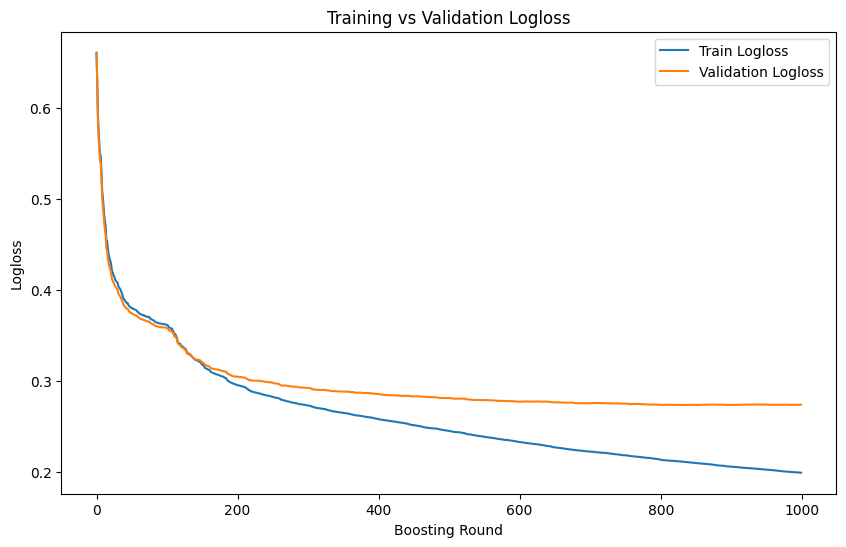

In [ ]:
# this is from train.py the model parameters are taken from optimize.py
# this is essentially our final model the one that performed best on validation set
# we can see there is no overfit, validation and training loss decrease smoothly 
# After around 1000 trees, loss barely change so with early stopping model stops adding trees
plot_history()

In [24]:
X_train = pd.read_csv(
        r"C:\Users\mertk\Documents\Python DS\credit_risk_prediction\credit_risk_prediction\data\feature_train.csv"
)

In [ ]:
model, res = fit_model()

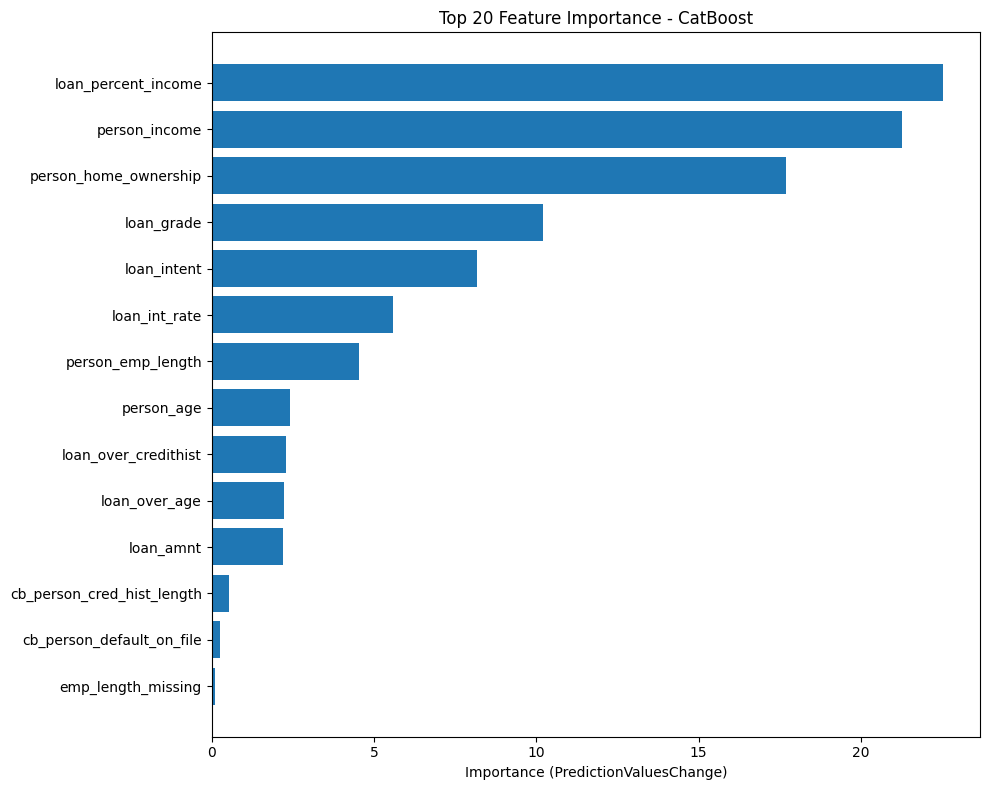

In [25]:
importances = model.get_feature_importance(type="PredictionValuesChange")
feature_names = X_train.columns

indices = np.argsort(importances)[::-1][:20]  # top 20

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel("Importance (PredictionValuesChange)")
plt.title("Top 20 Feature Importance - CatBoost")
plt.gca().invert_yaxis()  # biggest at top
plt.tight_layout()
plt.show()

When we look at variables seperately and how they associate with outcome variable we saw that people who are default had bigger loan amounts and interest rates however when we look at this plot we dont see them at the top. This might be due to the variation of the loan amount with the outcome variable might be explained by some other variable (like loan interest rate might be already explained by loan grade) as well or when other variables are known the association between loan amount and outcome variable might not be as predictive as others. In our EDA we mostly looked at bivariate relation however in the model we include many variables and how these variables associate with each other as well as outcome variable gain importance.

From this plot we see that top ranked features loan_percent_income, person_income, person_home_ownership are the ones that has the strongest influence on the model's default predictions. Changes in these variables leads to the largest shifts in the predicted probability for default.

In [4]:
test_metrics = pd.read_csv(
    r"C:\Users\mertk\Documents\Python DS\credit_risk_prediction\credit_risk_prediction\runs\cat_run_01\test_metrics.csv"
)
print(test_metrics)

   precision    recall        f1       AUC  threshold
0   0.946751  0.738213  0.829577  0.942286       0.66


In [8]:
test_predictions = pd.read_csv(
    r"C:\Users\mertk\Documents\Python DS\credit_risk_prediction\credit_risk_prediction\runs\cat_run_01\test_predictions.csv"
)

y_test = test_predictions['actual']
y_pred = test_predictions['predictions']

cm_train_custom = confusion_matrix(y_test, y_pred)
print("Train confusion matrix (threshold = 0.66):\n", cm_train_custom)

Train confusion matrix (threshold = 0.66):
 [[5035   59]
 [ 372 1049]]


True Positive = 1049

False Positive = 59

False Negative = 372

True Negative = 5035

In the test set when our model predicted someone is default it was correct 95% of time (Precision) so this means if our model says someone is going to be default we can trust the model most of the time which is important for credit risk problems. On the other hand our model could identify 74% of people who were default (Recall). With 0.94 AUC and 0.83 f1-score (harmonic mean of precision and recall) we can say that our model can identify most of the defaulters (recall) and produces few false alarms (precision)